In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
# 2. Charger les données dans pandas et afficher les colonnes
df = pd.read_csv("archive/ks-projects-201801.csv")
df

ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
...            ...                                                ...   
378656   999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
378657   999977640                                          The Tribe   
378658   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659   999987933                           BioDefense Education Kit   
378660   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

               category main_category currency    deadline     goal  \
0                Poetry    Publishing      GBP  2015-10-09   1000.0   
1        Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2        Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3                 Music         Music      USD  2012-04-16   5000.0   
4          Film & Video  Film & Video      USD  2015-08-29  19500.0   
...                 ...           ...      ...         ...      ...   
378656      Documentary  Film & Video      USD  2014-10-17  50000.0   
378657   Narrative Film  Film & Video      USD  2011-07-19   1500.0   
378658   Narrative Film  Film & Video      USD  2010-08-16  15000.0   
378659       Technology    Technology      USD  2016-02-13  15000.0   
378660  Performance Art           Art      USD  2011-08-16   2000.0   

                   launched  pledged     state  backers country  usd pledged  \
0       2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1       2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2       2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3       2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4       2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   
...                     ...      ...       ...      ...     ...          ...   
378656  2014-09-17 02:35:30     25.0  canceled        1      US         25.0   
378657  2011-06-22 03:35:14    155.0    failed        5      US        155.0   
378658  2010-07-01 19:40:30     20.0    failed        1      US         20.0   
378659  2016-01-13 18:13:53    200.0    failed        6      US        200.0   
378660  2011-07-19 09:07:47    524.0    failed       17      US        524.0   

        usd_pledged_real  usd_goal_real  
0                    0.0        1533.95  
1                 2421.0       30000.00  
2                  220.0       45000.00  
3                    1.0        5000.00  
4                 1283.0       19500.00  
...                  ...            ...  
378656              25.0       50000.00  
378657             155.0        1500.00  
378658              20.0       15000.00  
378659             200.0       15000.00  
378660             524.0        2000.00  

[378661 rows x 15 columns]

In [4]:
# 3. Obtenez des premières statistiques simples avec les méthodes standard de pandas. 
#df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
# 4. Afficher le nombre de données manquantes
df.isna().sum().sum()

3801

In [6]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [7]:
columns = [col.strip() for col in df.columns]
df.columns = columns
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [8]:
df.loc[df["state"] == "successful", :].count()

ID                  133956
name                133956
category            133956
main_category       133956
currency            133956
deadline            133956
goal                133956
launched            133956
pledged             133956
state               133956
backers             133956
country             133956
usd pledged         133851
usd_pledged_real    133956
usd_goal_real       133956
dtype: int64

In [9]:
# 5.1 Quelle est la proportion de campagnes réussies globalement 
mask = df['state'] == 'successful'

proportion_success = mask.sum() / len(df)
proportion_success * 100

35.37623362321443

In [10]:
df

ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
...            ...                                                ...   
378656   999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
378657   999977640                                          The Tribe   
378658   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659   999987933                           BioDefense Education Kit   
378660   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

               category main_category currency    deadline     goal  \
0                Poetry    Publishing      GBP  2015-10-09   1000.0   
1        Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2        Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3                 Music         Music      USD  2012-04-16   5000.0   
4          Film & Video  Film & Video      USD  2015-08-29  19500.0   
...                 ...           ...      ...         ...      ...   
378656      Documentary  Film & Video      USD  2014-10-17  50000.0   
378657   Narrative Film  Film & Video      USD  2011-07-19   1500.0   
378658   Narrative Film  Film & Video      USD  2010-08-16  15000.0   
378659       Technology    Technology      USD  2016-02-13  15000.0   
378660  Performance Art           Art      USD  2011-08-16   2000.0   

                   launched  pledged     state  backers country  usd pledged  \
0       2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1       2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2       2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3       2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4       2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   
...                     ...      ...       ...      ...     ...          ...   
378656  2014-09-17 02:35:30     25.0  canceled        1      US         25.0   
378657  2011-06-22 03:35:14    155.0    failed        5      US        155.0   
378658  2010-07-01 19:40:30     20.0    failed        1      US         20.0   
378659  2016-01-13 18:13:53    200.0    failed        6      US        200.0   
378660  2011-07-19 09:07:47    524.0    failed       17      US        524.0   

        usd_pledged_real  usd_goal_real  
0                    0.0        1533.95  
1                 2421.0       30000.00  
2                  220.0       45000.00  
3                    1.0        5000.00  
4                 1283.0       19500.00  
...                  ...            ...  
378656              25.0       50000.00  
378657             155.0        1500.00  
378658              20.0       15000.00  
378659             200.0       15000.00  
378660             524.0        2000.00  

[378661 rows x 15 columns]

In [11]:
# 5.2 Quelle est la proportion de campagnes réussies par catégories de projet
campagne_reussies_par_main_category:pd.Series = df[df["state"] == "successful"]["main_category"].value_counts(ascending=True)
campagne_par_main_category:pd.Series = df["main_category"].value_counts(ascending=True)
proportion_campagne_reussi:pd.Series = ((campagne_reussies_par_main_category / campagne_par_main_category) * 100)
proportion_campagne_reussi = proportion_campagne_reussi.sort_values(ascending=True)

In [12]:
import matplotlib.pyplot as plt

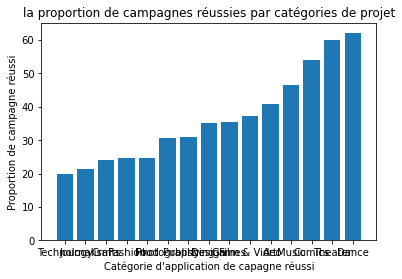

In [13]:
plt.bar(proportion_campagne_reussi.index, proportion_campagne_reussi.values)
plt.xlabel("Catégorie d'application de capagne réussi")
plt.ylabel("Proportion de campagne réussi")
plt.title("la proportion de campagnes réussies par catégories de projet")
plt.draw()

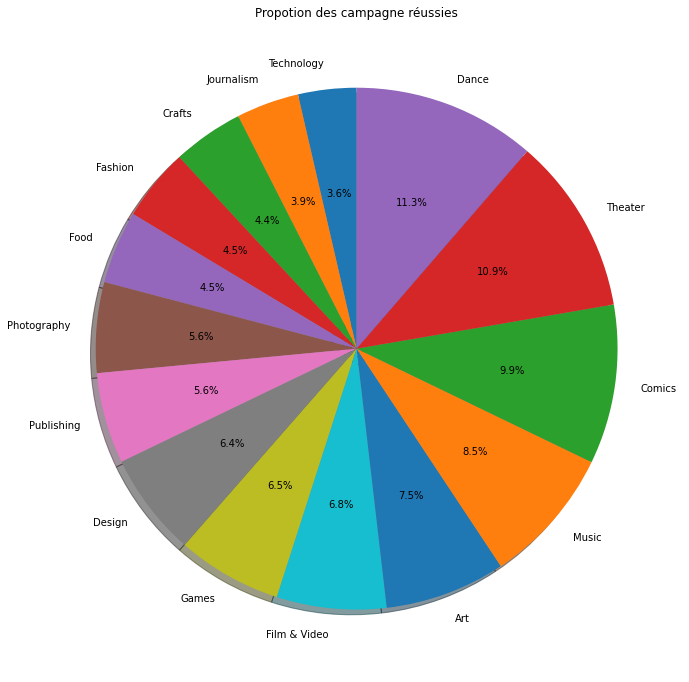

In [14]:
plt.rcParams["figure.figsize"] = [12,12]
plt.pie(proportion_campagne_reussi.values, labels=proportion_campagne_reussi.index, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Propotion des campagne réussies")
plt.draw()

In [15]:
# 5.3 Quelle est la somme moyenne demandée pour les projets réussis  et échoués globalement ?
mask_success = df["state"] == "successful"
mask_failed = df["state"] == "failed"

In [16]:
df[mask_success | mask_failed]["usd_goal_real"].mean()

41510.00154283584

In [17]:
# 5.4 Quelle est la somme moyenne demandée pour les projets réussis  et échoués par type de projet ? 
somme_moyenne_demande_par_categorie:pd.Series = df[mask_success | mask_failed].groupby("main_category")["usd_goal_real"].mean()
somme_moyenne_demande_par_categorie.sort_values(ascending=True, inplace=True)

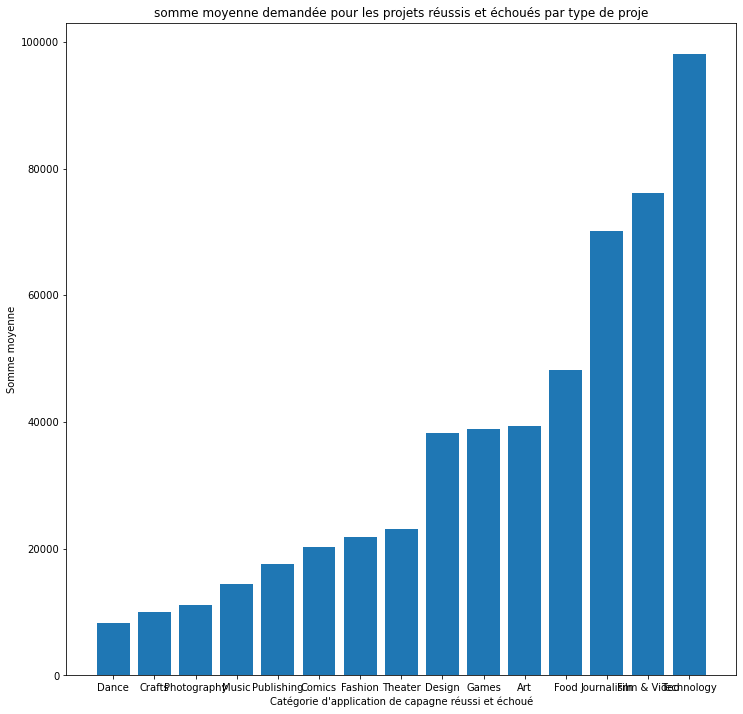

In [18]:
plt.bar(somme_moyenne_demande_par_categorie.index, somme_moyenne_demande_par_categorie.values)
plt.xlabel("Catégorie d'application de capagne réussi et échoué")
plt.ylabel("Somme moyenne")
plt.title("somme moyenne demandée pour les projets réussis et échoués par type de proje")
plt.draw()

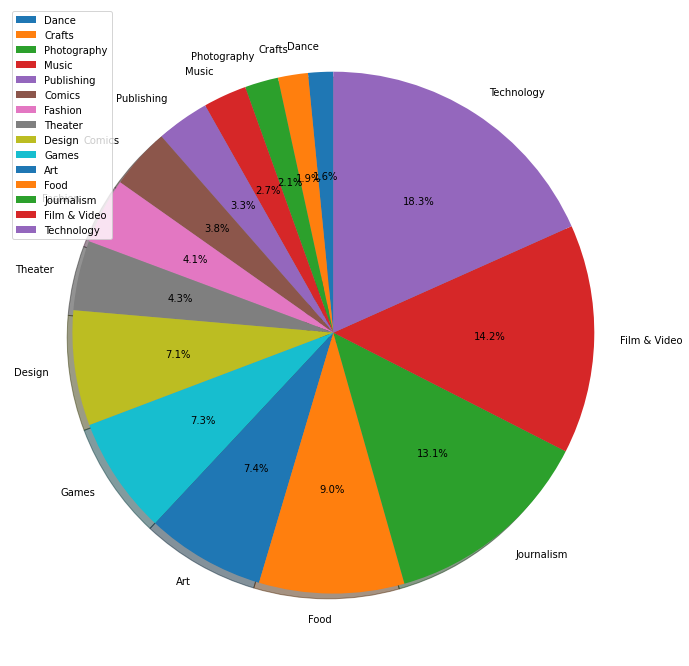

In [19]:
plt.rcParams["figure.figsize"] = [12,12]
plt.pie(somme_moyenne_demande_par_categorie.values, labels=somme_moyenne_demande_par_categorie.index, autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend()
plt.draw()

In [20]:
df[df["state"] == "failed"]

ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
7       1000030581  Chaser Strips. Our Strips make Shots their B*tch!   
...            ...                                                ...   
378654   999975836              Homemade fresh dog food, Cleveland OH   
378657   999977640                                          The Tribe   
378658   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659   999987933                           BioDefense Education Kit   
378660   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

               category main_category currency    deadline     goal  \
0                Poetry    Publishing      GBP  2015-10-09   1000.0   
1        Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2        Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3                 Music         Music      USD  2012-04-16   5000.0   
7                Drinks          Food      USD  2016-03-17  25000.0   
...                 ...           ...      ...         ...      ...   
378654      Small Batch          Food      USD  2017-04-19   6500.0   
378657   Narrative Film  Film & Video      USD  2011-07-19   1500.0   
378658   Narrative Film  Film & Video      USD  2010-08-16  15000.0   
378659       Technology    Technology      USD  2016-02-13  15000.0   
378660  Performance Art           Art      USD  2011-08-16   2000.0   

                   launched  pledged   state  backers country  usd pledged  \
0       2015-08-11 12:12:28      0.0  failed        0      GB          0.0   
1       2017-09-02 04:43:57   2421.0  failed       15      US        100.0   
2       2013-01-12 00:20:50    220.0  failed        3      US        220.0   
3       2012-03-17 03:24:11      1.0  failed        1      US          1.0   
7       2016-02-01 20:05:12    453.0  failed       40      US        453.0   
...                     ...      ...     ...      ...     ...          ...   
378654  2017-03-20 22:08:22    154.0  failed        4      US          0.0   
378657  2011-06-22 03:35:14    155.0  failed        5      US        155.0   
378658  2010-07-01 19:40:30     20.0  failed        1      US         20.0   
378659  2016-01-13 18:13:53    200.0  failed        6      US        200.0   
378660  2011-07-19 09:07:47    524.0  failed       17      US        524.0   

        usd_pledged_real  usd_goal_real  
0                    0.0        1533.95  
1                 2421.0       30000.00  
2                  220.0       45000.00  
3                    1.0        5000.00  
7                  453.0       25000.00  
...                  ...            ...  
378654             154.0        6500.00  
378657             155.0        1500.00  
378658              20.0       15000.00  
378659             200.0       15000.00  
378660             524.0        2000.00  

[197719 rows x 15 columns]

In [21]:
# 5.5 Parmi les campagnes qui ont échoué, combien ont raté leur cible de montant de 5% ou moins ?
mask_less_or_equal_5_goal = df["usd_pledged_real"] >= df["usd_goal_real"]*0.95
less_or_equal_5_goal = len(df[(mask_failed & mask_less_or_equal_5_goal)])
less_or_equal_5_goal

71

In [22]:
#  entre 5% et 10% ?
mask_less_between_5_and_10 = (df["usd_pledged_real"] < df["usd_goal_real"]*0.95) & (df["usd_pledged_real"] >= df["usd_goal_real"]*0.90)
less_between_5_and_10 = len(df[(mask_failed & mask_less_between_5_and_10)])
less_between_5_and_10

132

In [23]:
# entre 10% et 20% ?
mask_less_between_10_and_20 = (df["usd_pledged_real"] >= df["usd_goal_real"]*0.80) & (df["usd_pledged_real"] < df["usd_goal_real"]*0.90)
less_between_10_and_20 = len(df[(mask_failed & mask_less_between_10_and_20)])
less_between_10_and_20

600

Text(0.5, 1.0, 'Proportion des projets échoués entre 5 et 20% prêt')

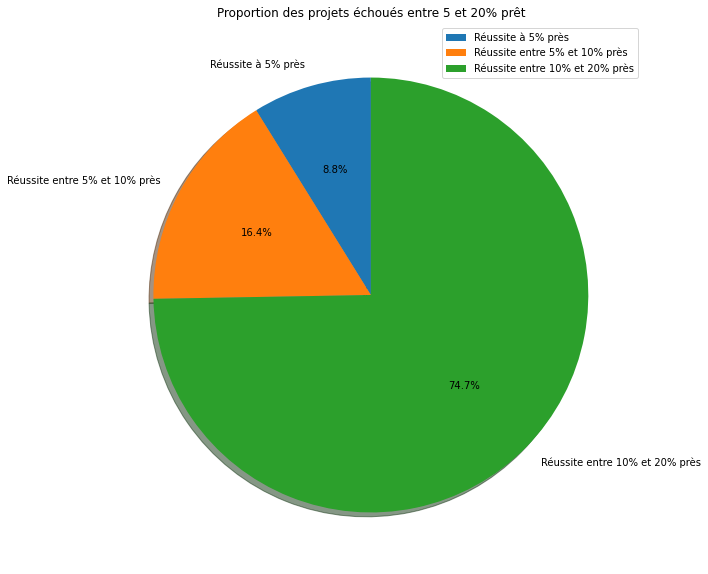

In [24]:
plt.rcParams["figure.figsize"] = [10,10]
plt.pie([less_or_equal_5_goal, less_between_5_and_10, less_between_10_and_20], 
labels=["Réussite à 5% près", "Réussite entre 5% et 10% près", "Réussite entre 10% et 20% près"], autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend()
plt.title("Proportion des projets échoués entre 5 et 20% prêt")

In [25]:
### Utilisation de la catégorie Games
games = df[df["category"] == "Games"]
mask_success = games["state"] == "successful"
mask_failed = games["state"] == "failed"

In [26]:
# 5.6 Faire cette même analyse sur 1 à 3 sous catégories Games
# Quelle est la proportion de campagnes réussies globalement ?
proportion_games_success = (mask_success).sum() / len(games)
proportion_games_success * 100

24.147551146931185

In [27]:
# Quelle est la somme moyenne demandée pour les projets Games réussis et échoués ?
games[mask_success | mask_failed]["usd_goal_real"].mean()

47955.07393467532

In [28]:
# Nous allons utulisé la catégorie Games
mask_games_less_or_equal_5_goal = games["usd_pledged_real"] >= games["usd_goal_real"]*0.95
games_less_or_equal_5_games_goal = len(games[(mask_failed & mask_games_less_or_equal_5_goal)])
games_less_or_equal_5_games_goal

0

In [29]:
#  entre 5% et 10% ?
mask_games_less_between_5_and_10 = (games["usd_pledged_real"] < games["usd_goal_real"]*0.95) & (games["usd_pledged_real"] >= games["usd_goal_real"]*0.90)
games_less_between_5_and_10 = len(games[(mask_failed & mask_games_less_between_5_and_10)])
games_less_between_5_and_10

1

In [30]:
# entre 10% et 20% ?
mask_games_less_between_10_and_20 = (games["usd_pledged_real"] >= games["usd_goal_real"]*0.80) & (games["usd_pledged_real"] < games["usd_goal_real"]*0.90)
games_less_between_10_and_20 = len(df[(mask_failed & mask_less_between_10_and_20)])
games_less_between_10_and_20

7

In [31]:
import seaborn as sns

In [32]:
games.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

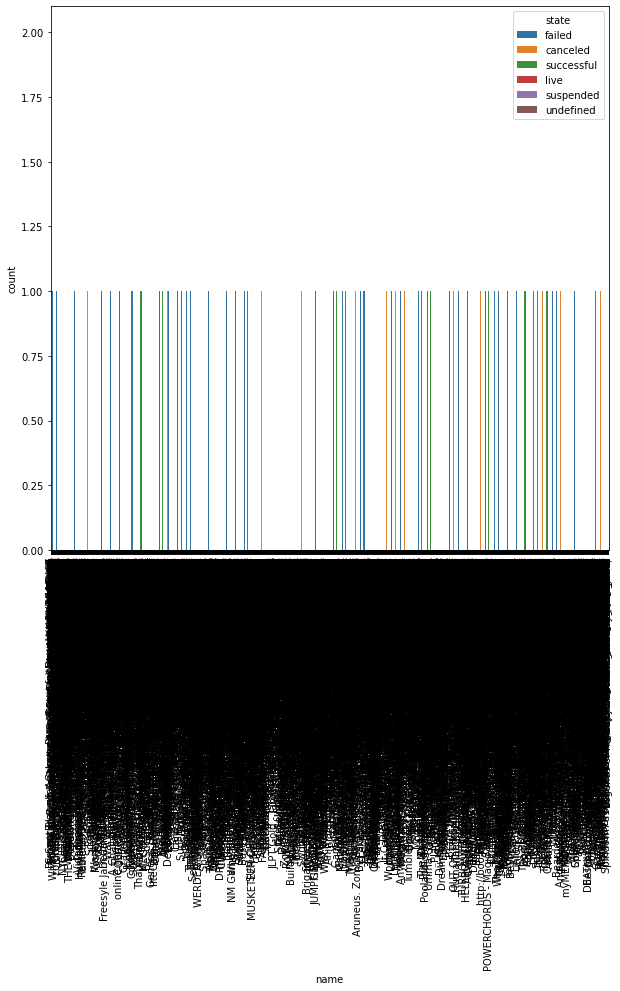

In [33]:
sns.countplot(x="name", data=games, hue="state")
plt.xticks(rotation="vertical")
plt.draw()